In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('train.csv')

In [3]:
data = df[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc']]
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,3,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,1,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,1,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,6,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,2,0.376838,16331452


In [4]:
# посмотрим на типы данных по столбцам и количество пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

In [5]:
# посмотрим на статистические показатели по столбцам
data.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,13.283916,3.958882,1.154586,6.855891,3.926702,1.505808,2.010973,2.896393,1.345235,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,8.497170,3.447536,1.541425,6.731484,4.907562,2.253759,2.306446,3.290058,3.053600,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.661366,0.003847,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,7.529625,1.543631,0.361170,2.201193,1.016728,0.483758,0.555231,1.000000,0.285124,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,11.910442,2.927417,0.656267,4.337579,2.031685,0.839647,1.052999,2.000000,0.493048,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,16.560167,5.485423,1.333994,9.380269,5.415663,1.549517,3.046687,4.000000,0.936324,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,59.501648,41.103651,26.652505,84.862148,55.278225,26.259543,18.958933,16.000000,47.394706,1.111111e+08


In [6]:
# посмотрим на количество уникальных значений по столбцам, что поможет найти закодированные категориальные признаки
data.nunique()

full_sq                                211
life_sq                                175
floor                                   41
max_floor                               49
material                                 6
build_year                             119
num_room                                13
kitch_sq                                74
state                                    5
area_m                                 146
raion_popul                            146
green_zone_part                        146
indust_part                            132
preschool_education_centers_raion       13
school_education_centers_raion          14
hospital_beds_raion                     79
healthcare_centers_raion                 7
sport_objects_raion                     24
additional_education_raion              12
shopping_centers_raion                  16
office_raion                            30
ID_metro                               223
metro_min_walk                       11834
kindergarte

In [7]:
# посмотрим на столбцы с целочисленным значением, что поможет найти закодированные категориальные признаки
cat_feat = list(data.dtypes[data.dtypes != float].index)
cat_feat

['full_sq',
 'raion_popul',
 'preschool_education_centers_raion',
 'school_education_centers_raion',
 'healthcare_centers_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'shopping_centers_raion',
 'office_raion',
 'ID_metro',
 'additional_education_raion',
 'price_doc']

In [8]:
cat_nunique = data[cat_feat].nunique()
print(cat_nunique)

full_sq                               211
raion_popul                           146
preschool_education_centers_raion      13
school_education_centers_raion         14
healthcare_centers_raion                7
sport_objects_raion                    24
additional_education_raion             12
additional_education_raion             12
shopping_centers_raion                 16
office_raion                           30
ID_metro                              223
additional_education_raion             12
additional_education_raion             12
price_doc                            9296
dtype: int64


In [9]:
data[cat_feat].head()

,full_sq,raion_popul,preschool_education_centers_raion,school_education_centers_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,additional_education_raion,shopping_centers_raion,office_raion,ID_metro,additional_education_raion,additional_education_raion,price_doc
0,43,155572,5,5,1,7,3,3,16,1,1,3,3,5850000
1,34,115352,5,8,1,6,1,1,3,0,2,1,1,6000000
2,43,101708,4,7,1,5,1,1,0,1,3,1,1,5700000
3,89,178473,9,10,1,17,6,6,11,4,4,6,6,13100000
4,77,108171,7,9,4,25,2,2,10,93,5,2,2,16331452


In [10]:
# попробуем обучить модель с грубыи заполнением пропусков
RANDOM_STATE = 7
N_FOLDS = 10

In [185]:
d_train, d_test, y_train, y_test = train_test_split(data.drop('price_doc',axis=1), data.price_doc, random_state=RANDOM_STATE, test_size=0.2)

In [186]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = d_train.fillna(-999)

X_test = d_test.fillna(-999)

In [187]:
X_train.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km
17015,59,44.0,3.0,9.0,1.0,1968.0,3.0,5.0,2.0,9.589337e+06,...,1.201551,6.853191,4.214405,0.507764,2.345303,0.332175,0.564793,0.689887,1,0.332175
14742,52,30.0,6.0,6.0,2.0,1989.0,2.0,8.0,-999.0,9.249237e+06,...,0.939255,21.084450,2.737192,0.591406,7.727351,1.359038,0.612408,0.591406,2,0.228386
28755,54,54.0,2.0,3.0,2.0,-999.0,2.0,1.0,-999.0,1.487016e+08,...,33.214743,44.624118,25.085530,7.354662,41.971774,37.681524,19.142082,15.422305,0,26.499723
8273,82,75.0,16.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.258354e+07,...,0.503765,26.369825,2.055468,0.355630,9.380269,1.016728,0.553097,0.654486,6,0.631866
25607,41,41.0,2.0,17.0,1.0,2012.0,1.0,10.0,3.0,2.553630e+07,...,5.825262,17.546003,8.968785,3.645170,14.893660,11.246064,0.340980,4.431284,0,1.068618


In [188]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [189]:
score_1 = f"MSE = {np.mean(-cross_val_score(model_rf,X_test,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print(score_1)

MSE = 8387586838469.958


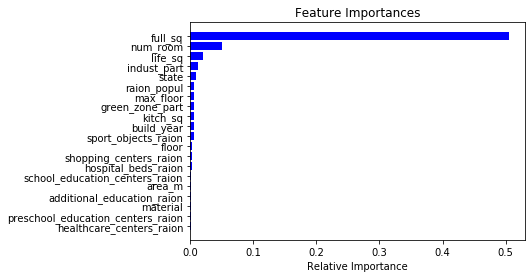

In [16]:
features = X_train.columns
importances = model_rf.feature_importances_[0:20]

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Самые важные признаки - 'full_sq', 'num_room','life_sq', 'indust_part'\
Посмотрим в них пропуски и выбросы.

'full_sq' - нет пропусков;\
'num_room','life_sq' - очень много пропусков;

## Заполняем пропуски

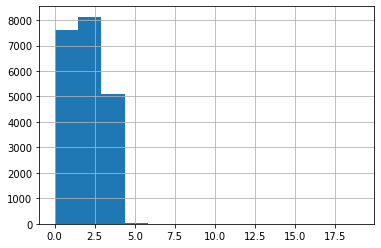

In [17]:
# смотрим признак'num_room'
data['num_room'].hist(bins=13)

Список уникальных значений для 'num_room' небольшой - 13 и почти 10000 значений пустых, распределение близко к нормальному - использовать можно среднее

In [18]:
data['num_room'].mean()

1.909804296856309

In [19]:
X_train_1 = d_train.copy()

X_test_1 = d_test.copy()

In [20]:
# Заменяем пропуски в колонке 'num_room' на среднее
X_train_1['num_room'] = d_train['num_room'].fillna(data['num_room'].mean())

X_test_1['num_room'] = d_test['num_room'].fillna(data['num_room'].mean())

In [21]:
# Заменяем остальные пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train_1 = X_train_1.fillna(-999)

X_test_1 = X_test_1.fillna(-999)

In [22]:
model_rf_1 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_1.fit(X_train_1, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [23]:
score_2 = f"MSE = {np.mean(-cross_val_score(model_rf_1,X_test_1,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_2)

MSE = 8376920864774.594


стало немного лучше

In [24]:
# смотрим признак'life_sq'
data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Список уникальных значений для 'life_sq' большой - 175 и почти 6000 значений пустых, очень большой разброс между минимальным и максимальным значением - использовать можно медиану

In [25]:
data['life_sq'].median()

30.0

In [26]:
X_train_2 = X_train_1.copy()

X_test_2 = X_test_1.copy()

In [27]:
# Заменяем пропуски в колонке 'life_sq' на медиану
X_train_2['life_sq'] = d_train['life_sq'].fillna(data['life_sq'].median())

X_test_2['life_sq'] = d_test['life_sq'].fillna(data['life_sq'].median())

In [28]:
model_rf_2 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_2.fit(X_train_2, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [29]:
score_3 = f"MSE = {np.mean(-cross_val_score(model_rf_2,X_test_2,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_3)

MSE = 8371550919683.42


стало еще немного лучше

## Посмотрим выбросы

In [30]:
data[['life_sq','full_sq', 'num_room']].describe()

,life_sq,full_sq,num_room
count,24088.000000,30471.000000,20899.000000
mean,34.403271,54.214269,1.909804
std,52.285733,38.031487,0.851805
min,0.000000,0.000000,0.000000
25%,20.000000,38.000000,1.000000
50%,30.000000,49.000000,2.000000
75%,43.000000,63.000000,2.000000
max,7478.000000,5326.000000,19.000000


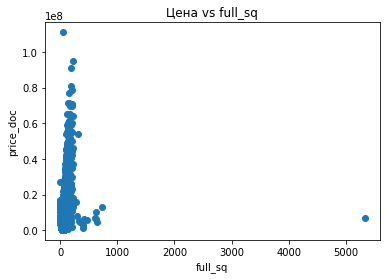

In [31]:
plt.scatter(data.full_sq, data.price_doc)
plt.xlabel('full_sq')
plt.ylabel('price_doc')
plt.title('Цена vs full_sq')
plt.show();

явно общую площадь более 1000 можно рассматривать как выброс

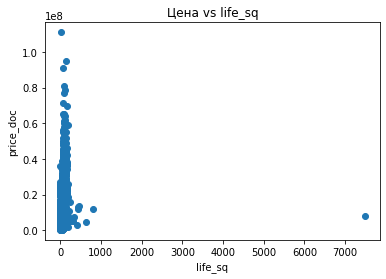

In [32]:
plt.scatter(data.life_sq, data.price_doc)
plt.xlabel('life_sq')
plt.ylabel('price_doc')
plt.title('Цена vs life_sq')
plt.show();

присутствует единичный выброс со значением 7478

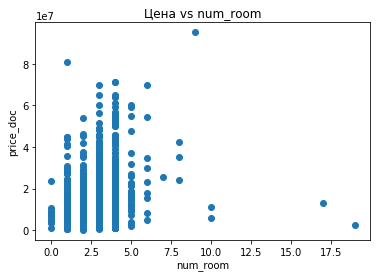

In [33]:
plt.scatter(data.num_room, data.price_doc)
plt.xlabel('num_room')
plt.ylabel('price_doc')
plt.title('Цена vs num_room')
plt.show();

количество комнат более 15 можно рассматривать тоже как выброс

Нулевые значения также скорее всего просто заполнение пропусков. Логичнее отфильтровать по 25 процентилю и явным выбросам по всех границе значений

In [69]:
#data_new = data.loc[(data['full_sq']>37.0) & (data['full_sq']<1000.0) & (data['life_sq']>19) & (data['life_sq']<1000.0) & (data['num_room']>0) & (data['num_room']<7.0)]
#data_new = data.loc[(data['full_sq']<1000.0) & (data['life_sq']<1000.0) & (data['num_room']<15.0)]
data_new = data.loc[(data['full_sq']<1000.0) & (data['life_sq']!=7478.0)]

In [70]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30469 entries, 0 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30469 non-null  int64  
 1   life_sq                            24086 non-null  float64
 2   floor                              30302 non-null  float64
 3   max_floor                          20898 non-null  float64
 4   material                           20898 non-null  float64
 5   build_year                         16865 non-null  float64
 6   num_room                           20898 non-null  float64
 7   kitch_sq                           20898 non-null  float64
 8   state                              16911 non-null  float64
 9   area_m                             30469 non-null  float64
 10  raion_popul                        30469 non-null  int64  
 11  green_zone_part                    30469 non-null  flo

In [71]:
data_new[['life_sq','full_sq', 'num_room']].describe()

,life_sq,full_sq,num_room
count,24086.000000,30469.000000,20898.000000
mean,34.094744,54.040435,1.909752
std,20.819231,23.114443,0.851792
min,0.000000,0.000000,0.000000
25%,20.000000,38.000000,1.000000
50%,30.000000,49.000000,2.000000
75%,43.000000,63.000000,2.000000
max,802.000000,729.000000,19.000000


In [72]:
# Заменяем пропуски в колонке 'num_room' на среднее
data_new['num_room'] = data_new['num_room'].fillna(data_new['num_room'].mean())

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
# Заменяем пропуски в колонке 'life_sq' на медиану
data_new['life_sq'] = data_new['life_sq'].fillna(data_new['life_sq'].median())

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
b_train, b_test, y_train, y_test = train_test_split(data_new.drop('price_doc',axis=1), data_new.price_doc, random_state=RANDOM_STATE, test_size=0.2)

In [75]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train_4 = b_train.fillna(-999)

X_test_4 = b_test.fillna(-999)

In [76]:
model_rf_4 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_4.fit(X_train_4, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [77]:
score_4 = f"MSE = {np.mean(-cross_val_score(model_rf_4,X_test_4,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_4)

MSE = 8472776000845.31


стало чуть хуже, так как размер выборки уменьшается после удаления выбросов

## Генерируем признаки

предположим, что наличие лифта увеличивает стоимость. Обычно в домах выше 5 этажа должен быть лифт.

In [98]:
data_new['max_floor'].fillna(-999)

0       -999.0
1       -999.0
2       -999.0
3       -999.0
4       -999.0
         ...  
30466      9.0
30467      9.0
30468     20.0
30469     15.0
30470      9.0
Name: max_floor, Length: 30469, dtype: float64

In [124]:
def get_group(x):    
    if x in data_new.loc[data_new['max_floor']> 5].values:
        return 1
    else:
        return 0
    
data_new['elevator'] = data_new['max_floor'].apply(get_group)

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [128]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30469 entries, 0 to 30470
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30469 non-null  int64  
 1   life_sq                            30469 non-null  float64
 2   floor                              30302 non-null  float64
 3   max_floor                          20898 non-null  float64
 4   material                           20898 non-null  float64
 5   build_year                         16865 non-null  float64
 6   num_room                           30469 non-null  float64
 7   kitch_sq                           20898 non-null  float64
 8   state                              16911 non-null  float64
 9   area_m                             30469 non-null  float64
 10  raion_popul                        30469 non-null  int64  
 11  green_zone_part                    30469 non-null  flo

In [129]:
c_train, c_test, y_train, y_test = train_test_split(data_new.drop('price_doc',axis=1), data_new.price_doc, random_state=RANDOM_STATE, test_size=0.2)

In [130]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train_5 = c_train.fillna(-999)

X_test_5 = c_test.fillna(-999)

In [131]:
model_rf_5 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_5.fit(X_train_5, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [132]:
score_5 = f"MSE = {np.mean(-cross_val_score(model_rf_5,X_test_5,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_5)

MSE = 8530763129585.474


с добавлением нового признака показатель немного ухудшился, гипотеза не оправдалась

In [133]:
data_new.drop('elevator',axis=1, inplace=True)

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Предположим, что квартиры-студио, у которых жилая и общая площадь совпадают, отличаются по стоимости

In [134]:
def get_group(x):    
    if x in data_new.loc[data_new['full_sq'] == data_new['life_sq']].values:
        return 1
    else: 
        return 0
    
data_new['studio'] = data_new['full_sq'].apply(get_group)

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [135]:
m_train, m_test, y_train, y_test = train_test_split(data_new.drop('price_doc',axis=1), data_new.price_doc, random_state=RANDOM_STATE, test_size=0.2)

In [136]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train_6 = m_train.fillna(-999)

X_test_6 = m_test.fillna(-999)

In [137]:
model_rf_6 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_6.fit(X_train_6, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [138]:
score_6 = f"MSE = {np.mean(-cross_val_score(model_rf_6,X_test_6,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_6)

MSE = 8502429350933.525


показатель также немного ухудшился, гипотеза не оправдалась

In [140]:
data_new.drop('studio',axis=1, inplace=True)

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


возможно год постройки имеет значение, обозначим дома после 2000 года постройки - как новостройки, с 1980 до 2000 - капремонт, ранее 1980 - реновация

In [141]:
def get_group(x):    
    if x in data_new.loc[data_new['build_year']>2000.0].values:
        return "новостройки"
    elif x in data_new.loc[(data_new['build_year']>=1980.0) & (data_new['build_year'] <=2000.0)].values:
        return "капремонт"
    else: 
        return 'реновация'
    
data_new['age_house'] = data_new['build_year'].apply(get_group)

C:\Users\BEU_RU1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [109]:
# сформируем новые признаки через LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [142]:
le.fit(data_new['age_house'])

LabelEncoder()

In [143]:
le.classes_

array(['капремонт', 'новостройки', 'реновация'], dtype=object)

In [163]:
data_new_1 = data_new.copy()

In [164]:
data_new_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30469 entries, 0 to 30470
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30469 non-null  int64  
 1   life_sq                            30469 non-null  float64
 2   floor                              30302 non-null  float64
 3   max_floor                          20898 non-null  float64
 4   material                           20898 non-null  float64
 5   build_year                         16865 non-null  float64
 6   num_room                           30469 non-null  float64
 7   kitch_sq                           20898 non-null  float64
 8   state                              16911 non-null  float64
 9   area_m                             30469 non-null  float64
 10  raion_popul                        30469 non-null  int64  
 11  green_zone_part                    30469 non-null  flo

In [165]:
data_new_1['age_house'] = le.transform(data_new['age_house'])

In [166]:
n_train, n_test, y_train, y_test = train_test_split(data_new_1.drop('price_doc', axis = 1), data_new_1.price_doc, random_state=RANDOM_STATE, test_size=0.2)

In [167]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train_7 = n_train.fillna(-999)

X_test_7 = n_test.fillna(-999)

In [168]:
model_rf_7 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_7.fit(X_train_7, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [169]:
score_7 = f"MSE = {np.mean(-cross_val_score(model_rf_7,X_test_7,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_7)

MSE = 8510590428284.084


показатель также немного ухудшился, гипотеза не оправдалась

In [171]:
data_new_2 = pd.get_dummies(data_new.drop('price_doc', axis = 1))

In [172]:
data_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30469 entries, 0 to 30470
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30469 non-null  int64  
 1   life_sq                            30469 non-null  float64
 2   floor                              30302 non-null  float64
 3   max_floor                          20898 non-null  float64
 4   material                           20898 non-null  float64
 5   build_year                         16865 non-null  float64
 6   num_room                           30469 non-null  float64
 7   kitch_sq                           20898 non-null  float64
 8   state                              16911 non-null  float64
 9   area_m                             30469 non-null  float64
 10  raion_popul                        30469 non-null  int64  
 11  green_zone_part                    30469 non-null  flo

In [173]:
t_train, t_test, y_train, y_test = train_test_split(data_new_2, data_new.price_doc, random_state=RANDOM_STATE, test_size=0.2)

In [174]:
# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train_8 = t_train.fillna(-999)

X_test_8 = t_test.fillna(-999)

In [175]:
model_rf_8 = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=20, max_features=0.8, n_jobs=-1, bootstrap=True, random_state=RANDOM_STATE)
model_rf_8.fit(X_train_8, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [176]:
score_8 = f"MSE = {np.mean(-cross_val_score(model_rf_8,X_test_8,y_test,cv=N_FOLDS,scoring='neg_mean_squared_error'))}"
print (score_8)

MSE = 8514546654354.06


показатель также немного ухудшился, гипотеза не оправдалась

In [190]:
score = [8387586838469.958, 8376920864774.594, 8371550919683.42, 8472776000845.31, 8530763129585.474, 8502429350933.525, 8510590428284.084, 8514546654354.06]
score

[8387586838469.958,
 8376920864774.594,
 8371550919683.42,
 8472776000845.31,
 8530763129585.474,
 8502429350933.525,
 8510590428284.084,
 8514546654354.06]

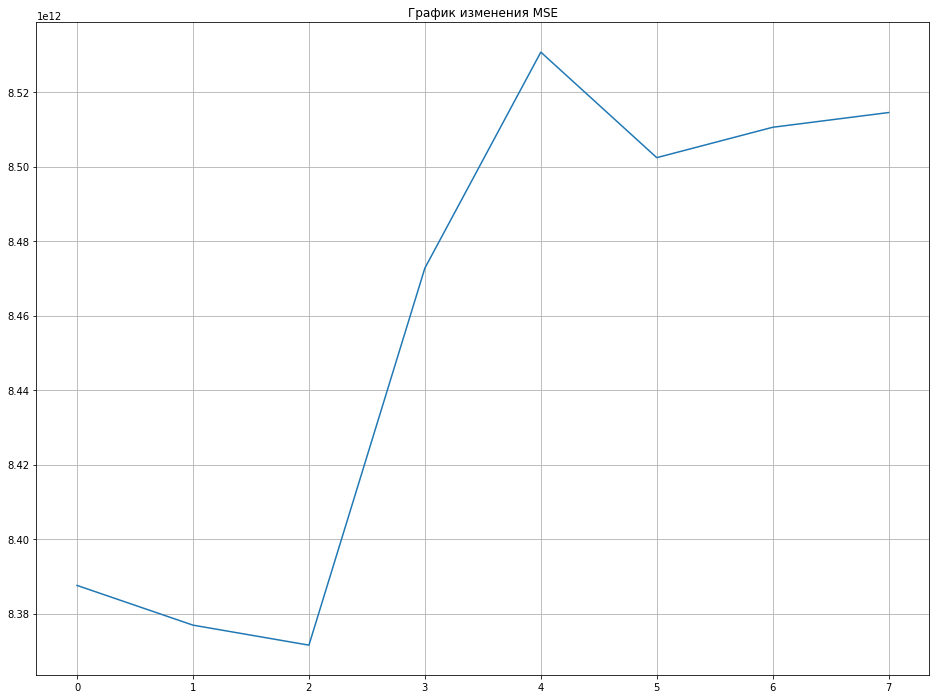

In [191]:
plt.figure(figsize=(16,12))
plt.plot(score)
plt.title('График изменения MSE')
plt.grid()
plt.show();

Как показала практика - очень важно владеть знаниями в сфере анализа, \
чтобы знать как правильно заполнить пропуски и убирать выбросы, а также генерировать новые признаки. \
Иначе показатель ошибок только возрастает.\
Возможно, столо также посмотреть корреляцию признаков и убрать лишние, наоборот.\
Можно было попробовать обработать выборы через интерквантильны разброс, но это сильно уменьшает набор данных.\
А также правильно выбирать модель.\
В целом хорошая тренировка навыков получилась, но довольно объемный подход в задании, поэтому проверил лишь часть гипотез
